<a href="https://colab.research.google.com/github/Abogundipe/Credit-Card-Fraud-Detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection ML Project



In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Import the Data

**Data Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [112]:
# Import the data set
cdf=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [113]:
# Review Data properties
cdf.shape

(284807, 31)

In [114]:
# Target variable is Class
# 0 signifies transaction is not fraudulent and 1 signifies fraudulent transaction
cdf['Class']. value_counts() # Count of fraudulent and non fraudulent data

Class
0    284315
1       492
Name: count, dtype: int64

<ipython-input-115-8e32a3abddfe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class',data=cdf,palette="pastel")


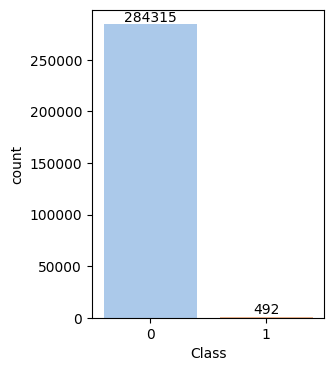

In [115]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=cdf,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

# Imbalanced Data
Based on the result above, it is clear that we have an imbalanced dataset. In classification tasks, imbalanced data occurs when there's a major disparity in the number of instances between different classes. This means that one class, known as the minority class, is significantly underrepresented compared to the majority class. For instance, you might have a dataset where one class appears 100 or even 1000 times less frequently than another. In this instance, non-fraudulent transactions are way more common than fraudulent transactions, ***with 284,315 instances of non-fraudulent transactions compared to just 49 instances of fraudulent ones***. This significant imbalance can pose challenges for machine learning models, especially in accurately predicting the minority class due to its limited representation in the data



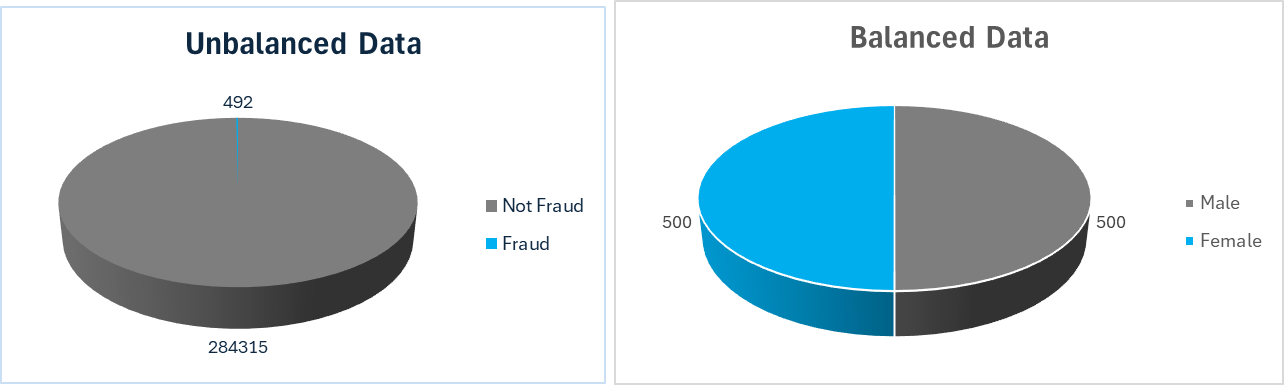

In [117]:
# Check Data properties/type
# Inspect for variable types and missing/null values
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Observation** - No missing/Null values detected and all variales appear to be numerical

In [118]:
# Descriptive Statistics

cdf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<ipython-input-119-9a5c1d6c89ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class',data=df,palette="pastel")


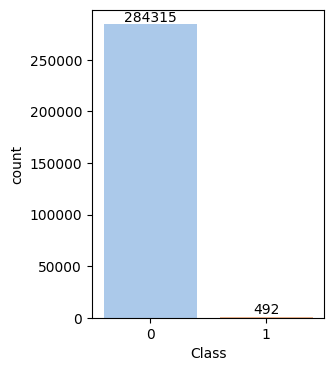

In [119]:
# Remove Duplicates

plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [121]:
df = cdf.copy()

In [122]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 50)

Duplicated values dropped succesfully
**************************************************


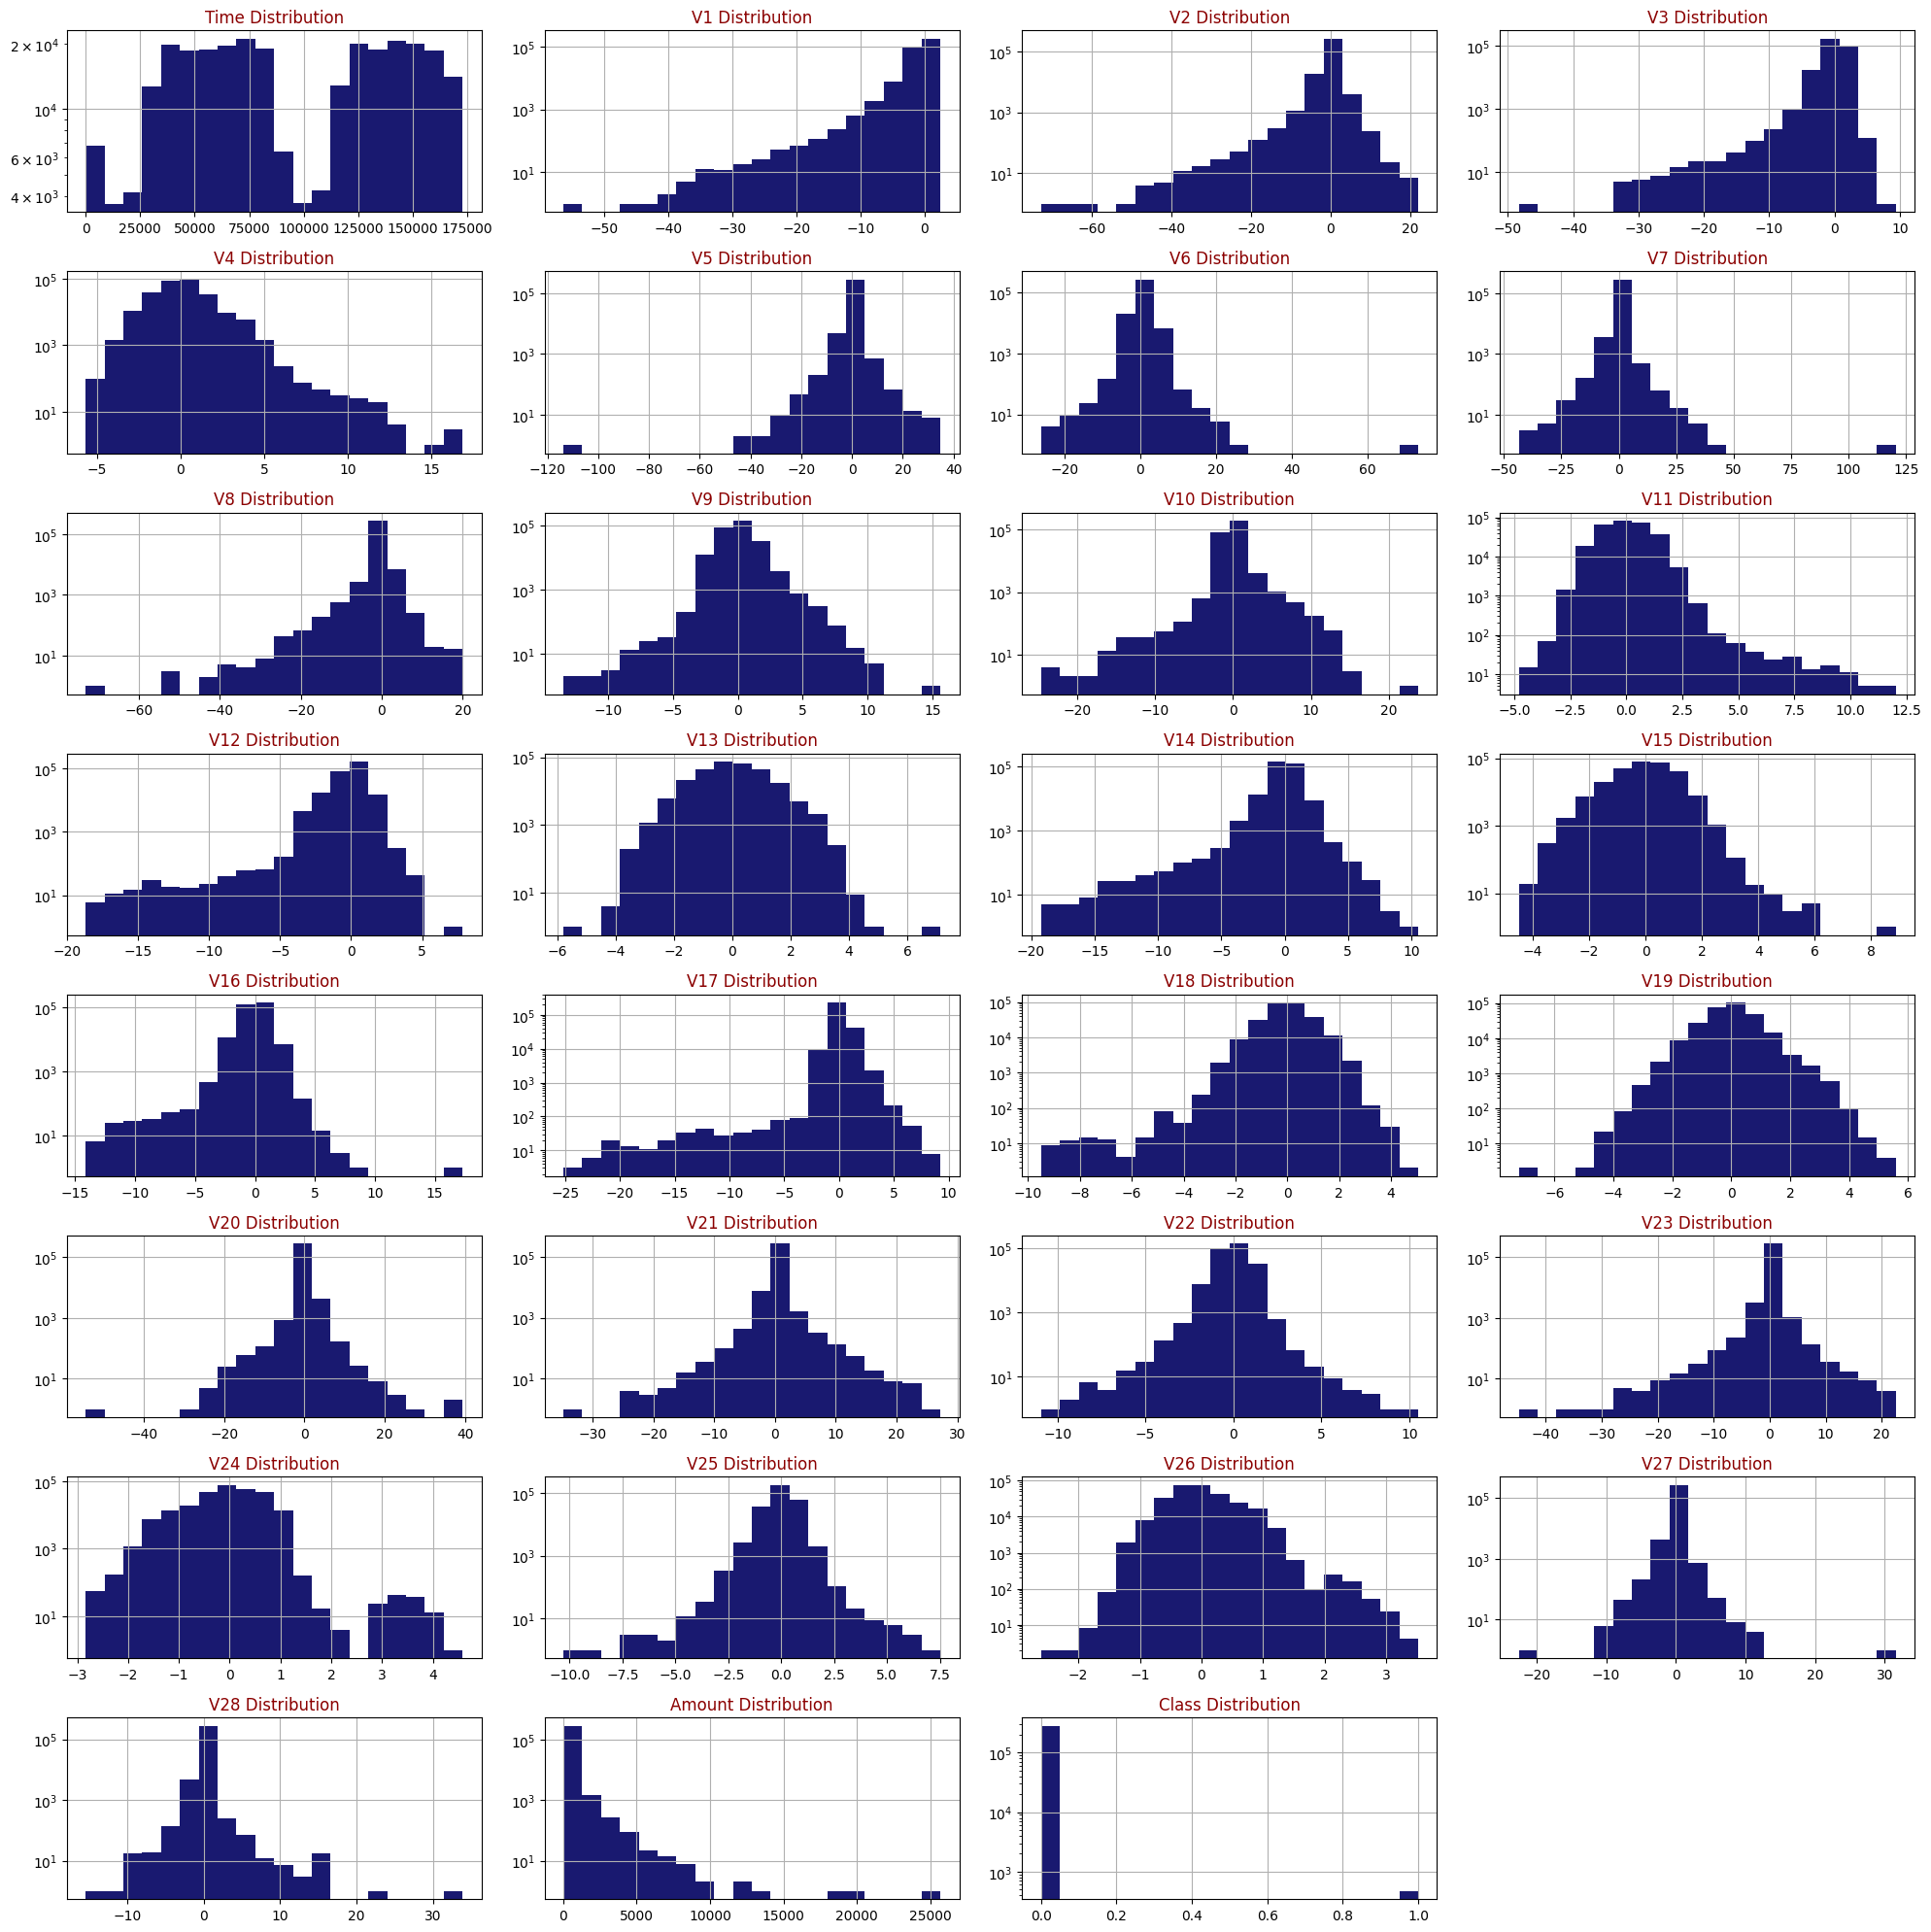

In [123]:

# Check distribution of dataset
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()

draw_histograms(df,df.columns,8,4)

In [48]:
# Create training labels

### Independent and dependent variables
X = df.drop("Class", axis = 1)
y = df.Class

**Logistic Regression**




In [49]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [50]:
# Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [51]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [52]:
y_pred=clf.predict(X_test)

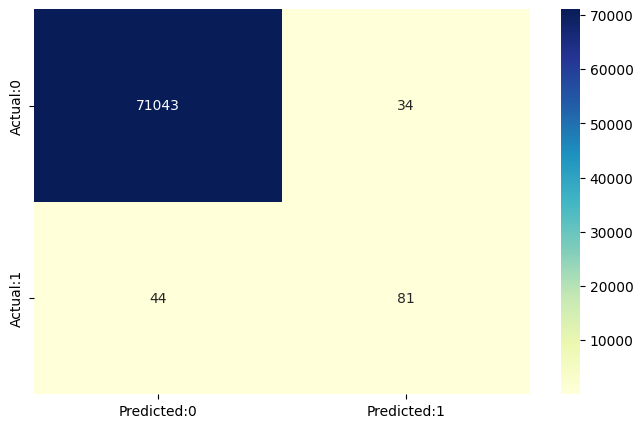

In [53]:
confusionmatrix=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=confusionmatrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

## 71026 = True Positive
## 34 = False Negative
## 42 = False Positive
## 100 = True Negative

In [54]:
print(accuracy_score(y_test,y_pred))

0.9989045251537878


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.70      0.65      0.68       125

    accuracy                           1.00     71202
   macro avg       0.85      0.82      0.84     71202
weighted avg       1.00      1.00      1.00     71202



In [56]:
## F1 Score
2*0.69*0.72/(0.72+0.69)

0.7046808510638298

# **Random Forrest Classifier**

In [58]:
classifier=RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [59]:
y_pred=classifier.predict(X_test)

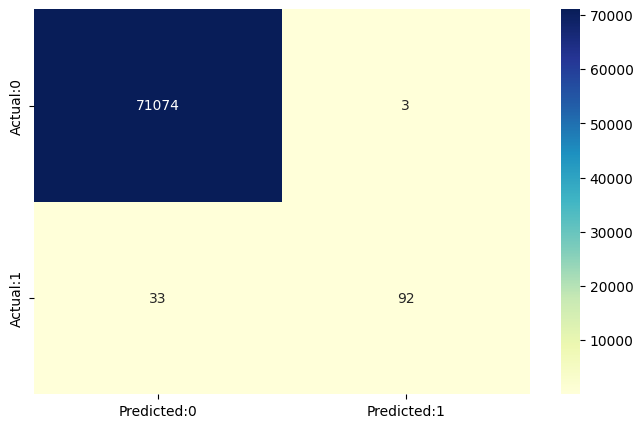

In [60]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [61]:
print(accuracy_score(y_test,y_pred))

0.9994943962248252


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.97      0.74      0.84       125

    accuracy                           1.00     71202
   macro avg       0.98      0.87      0.92     71202
weighted avg       1.00      1.00      1.00     71202



# Importing imblearn library for performing under sampling :

In [67]:
pip install imbalanced-learn

# Performing Under Sampling : NearMiss
Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.

NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.

NearMiss-3: Majority class examples with minimum distance to each minority class example.

In [66]:
from collections import Counter
Counter(y_train)

Counter({0: 213238, 1: 367})

In [70]:
from collections import Counter
from imblearn.under_sampling import NearMiss

# Initialize NearMiss with desired parameters
ns = NearMiss(version=1, n_neighbors=3)

# Perform under-sampling on the training data
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)

# Print the number of classes before and after fit
print("The number of classes before fit: {}".format(Counter(y_train)))
print("The number of classes after fit: {}".format(Counter(y_train_ns)))

The number of classes before fit: Counter({0: 213238, 1: 367})
The number of classes after fit: Counter({0: 367, 1: 367})


In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [72]:
y_pred=classifier.predict(X_test)

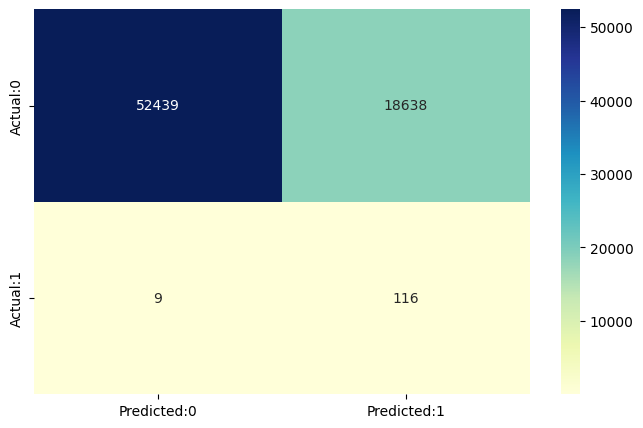

In [73]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [74]:
print(accuracy_score(y_test,y_pred))

0.7381112890087357


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     71077
           1       0.01      0.93      0.01       125

    accuracy                           0.74     71202
   macro avg       0.50      0.83      0.43     71202
weighted avg       1.00      0.74      0.85     71202



# CatBoost : Overfit Detector

In [76]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


In [82]:
# map categorical features
credit_catboost_ready_df = df.dropna()

# Get list of features (excluding 'Class')
features = [feat for feat in credit_catboost_ready_df.columns if feat != 'Class']
print(features)

# Identify indices of categorical features
card_categories = np.where(credit_catboost_ready_df[features].dtypes != np.float64)[0]
card_categories

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


array([], dtype=int64)

In [89]:
# Setting the Random Seed
SEED = 1234

# imports the CatBoostClassifier class from the CatBoost library. CatBoostClassifier is a machine learning model used for classification tasks, and it's optimized for handling categorical features efficiently
from catboost import CatBoostClassifier

# This dictionary contains various parameters that configure the behavior of the CatBoostClassifier model during training
params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':card_categories,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': SEED
          }

# This line initializes a CatBoostClassifier model with the parameters specified in the params dictionary
cat_model = CatBoostClassifier(**params)

# This line trains the CatBoostClassifier model on the training data
cat_model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7440568	best: 0.7440568 (0)	total: 50.2ms	remaining: 4m 10s
200:	test: 0.9692005	best: 0.9693486 (190)	total: 10.7s	remaining: 4m 15s
400:	test: 0.9712525	best: 0.9717416 (327)	total: 21.5s	remaining: 4m 6s
600:	test: 0.9759291	best: 0.9759465 (596)	total: 31.4s	remaining: 3m 49s
800:	test: 0.9772542	best: 0.9774175 (739)	total: 41.7s	remaining: 3m 38s
1000:	test: 0.9779813	best: 0.9779813 (1000)	total: 53s	remaining: 3m 31s
1200:	test: 0.9779257	best: 0.9781431 (1103)	total: 1m 4s	remaining: 3m 23s
1400:	test: 0.9772052	best: 0.9781431 (1103)	total: 1m 15s	remaining: 3m 14s
1600:	test: 0.9763217	best: 0.9781431 (1103)	total: 1m 27s	remaining: 3m 5s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.9781431405
bestIteration = 1103

Shrink model to first 1104 iterations.


In [90]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

# AdaBoost Classifier:

**Adaboost library installing**

In [91]:
pip install ada-boost

In [92]:
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [93]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [94]:
clf.fit(df[predictors],df['Class'].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [95]:
y_pred = clf.predict(df[predictors])

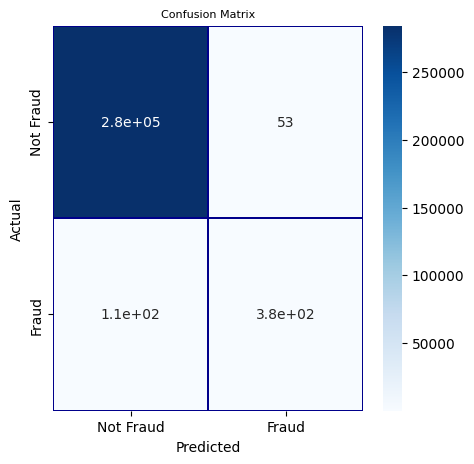

In [96]:
cm = pd.crosstab(df[target].values, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=8)
plt.show()

In [97]:
y_pred = cat_model.predict(X_test)

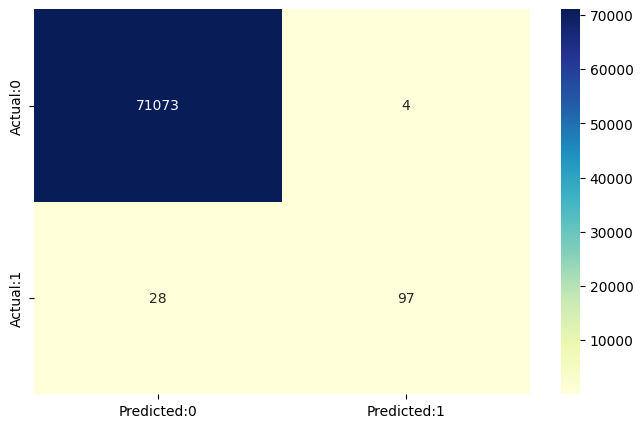

In [98]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

# SMOTE Analysis

In [101]:
pip install imblearn

In [103]:
from imblearn.combine import SMOTETomek

In [105]:
os = SMOTETomek(random_state=42)
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)

print("The number of classes before fit: {}".format(Counter(y_train)))
print("The number of classes after fit: {}".format(Counter(y_train_ns)))

The number of classes before fit: Counter({0: 213238, 1: 367})
The number of classes after fit: Counter({0: 212759, 1: 212759})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))